In [29]:
import csv
import gzip
import sys 
sys.path.append("/scratch/izar/kapps/DEX-Cyclic-Arbitrage/")
from helper import *
import numpy as np 

print("===========================================")
uniswap_raw_data_path = "/scratch/izar/kapps/DEX-Cyclic-Arbitrage/data/uniswap_raw_data_0_1000.json.gz"

print("Randomly Loading one uni data point")
data = None
for line in  gzip.open(uniswap_raw_data_path,"rt"):
    if np.random.binomial(1, 0.01, 1)[0]==1:
        data=json.loads(line)
    
print("data loaded")   
def load_transaction_hashs():
    """load the cycles transaction hashs in a dictionary with cycle_id as key, only works on the filtered cycles dataset"""
    filtered_cycles = load_cycles("filtered")
    res = {}
    for cycle in filtered_cycles:
        cycle = json.loads(cycle)
        cycle_id = cycle.pop("cycle_id")
        data = cycle
        res[cycle_id] = data["receipt"]["logs"][0]['transactionHash']
    return res


print("Loading tx hashs")
cycle_transaction_hashs = load_transaction_hashs()

Randomly Loading one uni data point
data loaded
Loading tx hashs


In [30]:
# in this cell we search for the trade appearing in the cycles
trades = data["data"]["data"]["ethereum"]["dexTrades"]
cycle_id = data["cycle_id"]

cycle_trade = None

tx_hash_cycle = cycle_transaction_hashs[cycle_id]
for trade in trades:
    tx_hash_trade =  trade['transaction']["hash"]
    if tx_hash_trade==tx_hash_cycle:
        cycle_trade = trade
        print(cycle_trade)

{u'timeInterval': {u'second': u'2020-06-22 07:39:51'}, u'quoteCurrency': {u'symbol': u'DZAR', u'address': u'0x9cb2f26a23b8d89973f08c957c4d7cdf75cd341c'}, u'transaction': {u'hash': u'0x809f8d5fb160d8bcc220fa53d8bb894916a83b82873ac84e0e81d70233312192'}, u'minimum_price': 21966.510972024145, u'baseAmount': 0.2402368822577619, u'trades': 1, u'gasValue': 0.00913872940695552, u'quotePrice': 21966.510972024145, u'quoteAmount': 5277.16611, u'open_price': u'21966.510972024145', u'gasPrice': 34.319998976, u'close_price': u'21966.510972024145', u'maximum_price': 21966.510972024145, u'baseCurrency': {u'symbol': u'BPT', u'address': u'0x0e511aa1a137aad267dfe3a6bfca0b856c1a3682'}}


Good news : we managed to find the trade, now let check the corresponding values on Etherscan

In [31]:
ether_scan_address = "https://etherscan.io/tx/"+cycle_trade['transaction']["hash"]
print(ether_scan_address)

https://etherscan.io/tx/0x809f8d5fb160d8bcc220fa53d8bb894916a83b82873ac84e0e81d70233312192


transaction actions are the following : 
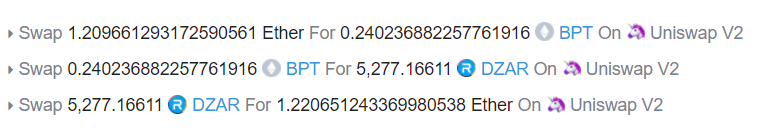

In [36]:
print(str(cycle_trade['quoteCurrency']["symbol"]),":",
     cycle_trade['quoteAmount']," ",
     str(cycle_trade['baseCurrency']["symbol"]),":",
     cycle_trade['baseAmount']
     )

('DZAR', ':', 5277.16611, ' ', 'BPT', ':', 0.2402368822577619)
